<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [64]:
#importing data from excelsheet
corporate_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(corporate_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [65]:
corporate_mod=data.groupby('Segment')
corporate_data=corporate_mod.get_group('Corporate')
corporate_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3224,3225,CA-2014-108189,2014-10-02,2014-10-05,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,Arizona,85281,West,TEC-PH-10001760,Technology,Phones,Bose SoundLink Bluetooth Speaker,318.400,2,0.2,107.4600
2965,2966,CA-2017-137428,2017-12-16,2017-12-21,Second Class,AY-10555,Andy Yotov,Corporate,United States,Oceanside,California,92054,West,FUR-FU-10002445,Furniture,Furnishings,"DAX Two-Tone Rosewood/Black Document Frame, De...",18.960,2,0.0,7.5840
3181,3182,CA-2017-152912,2017-11-09,2017-11-12,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,9.640,2,0.0,4.4344
302,303,CA-2016-142545,2016-10-28,2016-11-03,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,New Jersey,7109,East,OFF-BI-10002706,Office Supplies,Binders,Avery Premier Heavy-Duty Binder with Round Loc...,14.280,1,0.0,6.5688
1426,1427,US-2015-164448,2015-10-31,2015-11-04,Second Class,DK-12835,Damala Kotsonis,Corporate,United States,Salinas,California,93905,West,OFF-BI-10002949,Office Supplies,Binders,Prestige Round Ring Binders,9.728,2,0.2,3.2832


In [66]:
corporate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2 to 9988
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3020 non-null   int64         
 1   Order ID       3020 non-null   object        
 2   Order Date     3020 non-null   datetime64[ns]
 3   Ship Date      3020 non-null   datetime64[ns]
 4   Ship Mode      3020 non-null   object        
 5   Customer ID    3020 non-null   object        
 6   Customer Name  3020 non-null   object        
 7   Segment        3020 non-null   object        
 8   Country        3020 non-null   object        
 9   City           3020 non-null   object        
 10  State          3020 non-null   object        
 11  Postal Code    3020 non-null   int64         
 12  Region         3020 non-null   object        
 13  Product ID     3020 non-null   object        
 14  Category       3020 non-null   object        
 15  Sub-Category   3020 non-nu

In [67]:
for i in corporate_data.columns:
  print(i,':','\t',corporate_data[i].isnull().sum())

Row ID : 	 0
Order ID : 	 0
Order Date : 	 0
Ship Date : 	 0
Ship Mode : 	 0
Customer ID : 	 0
Customer Name : 	 0
Segment : 	 0
Country : 	 0
City : 	 0
State : 	 0
Postal Code : 	 0
Region : 	 0
Product ID : 	 0
Category : 	 0
Sub-Category : 	 0
Product Name : 	 0
Sales : 	 0
Quantity : 	 0
Discount : 	 0
Profit : 	 0


In [68]:
for i in corporate_data.columns:
  print(i,':','\n',corporate_data[i].unique())

Row ID : 
 [   3   22   23 ... 9967 9988 9989]
Order ID : 
 ['CA-2016-138688' 'CA-2016-137330' 'CA-2016-117590' ... 'CA-2015-141593'
 'CA-2016-146374' 'CA-2017-163629']
Order Date : 
 <DatetimeArray>
['2016-06-12 00:00:00', '2016-12-09 00:00:00', '2016-12-08 00:00:00',
 '2017-09-10 00:00:00', '2016-07-17 00:00:00', '2017-09-19 00:00:00',
 '2016-03-11 00:00:00', '2016-12-11 00:00:00', '2014-12-05 00:00:00',
 '2017-12-09 00:00:00',
 ...
 '2014-06-10 00:00:00', '2014-08-20 00:00:00', '2017-03-16 00:00:00',
 '2014-02-14 00:00:00', '2015-06-08 00:00:00', '2016-05-02 00:00:00',
 '2014-04-03 00:00:00', '2015-09-13 00:00:00', '2016-06-03 00:00:00',
 '2014-03-02 00:00:00']
Length: 830, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-06-16 00:00:00', '2016-12-13 00:00:00', '2016-12-10 00:00:00',
 '2017-09-15 00:00:00', '2016-07-22 00:00:00', '2017-09-23 00:00:00',
 '2016-03-13 00:00:00', '2016-12-17 00:00:00', '2014-12-10 00:00:00',
 '2017-12-11 00:00:00',
 ...
 '2017-03-21 00:00:00',

In [69]:
corporate_data.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,3020.000000,3020,3020,3020,3020,3020,3020,3020,3020,3020,3020,3020.000000,3020,3020,3020,3020,3020,3020.000000,3020.000000,3020.000000,3020.000000
unique,NaN,1514,NaN,NaN,4,236,236,1,1,340,45,NaN,4,1456,3,17,1444,NaN,NaN,NaN,NaN
top,NaN,CA-2017-157987,NaN,NaN,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,California,NaN,West,FUR-CH-10002880,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,1812,32,32,3020,3020,266,618,NaN,960,8,1820,473,18,NaN,NaN,NaN,NaN
mean,5134.017881,NaN,2016-04-27 17:31:52.052980224,2016-05-01 17:42:50.066225152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54482.228477,NaN,NaN,NaN,NaN,NaN,233.823300,3.843709,0.158228,30.456667
min,3.000000,NaN,2014-01-06 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1453.000000,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-3839.990400
25%,2584.000000,NaN,2015-05-03 12:00:00,2015-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22153.000000,NaN,NaN,NaN,NaN,NaN,17.469000,2.000000,0.000000,1.928400
50%,5340.500000,NaN,2016-07-02 00:00:00,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53209.000000,NaN,NaN,NaN,NaN,NaN,56.540000,3.000000,0.200000,8.694000
75%,7646.500000,NaN,2017-05-13 00:00:00,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90004.000000,NaN,NaN,NaN,NaN,NaN,212.895000,5.000000,0.200000,29.843500
max,9989.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99207.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


**Details about Corporate category**

In [70]:
corporate_data['Category'].value_counts()

,count
Category,
Office Supplies,1820
Furniture,646
Technology,554


**Exploratory Data Analysis**

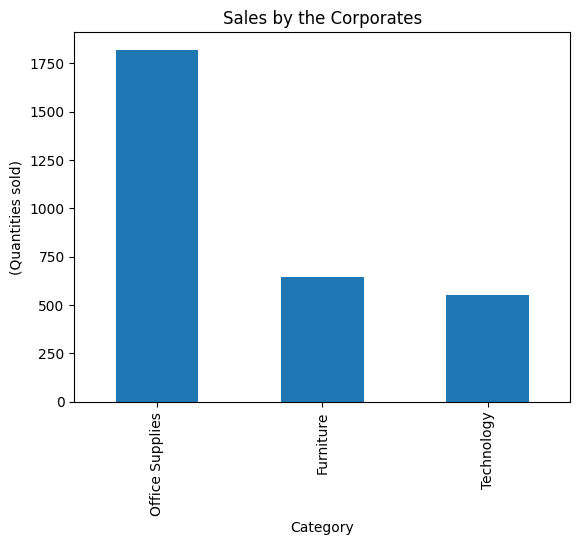

In [71]:
#sales of category items under Corporate segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
corporate_data['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Corporates")
plt.show()

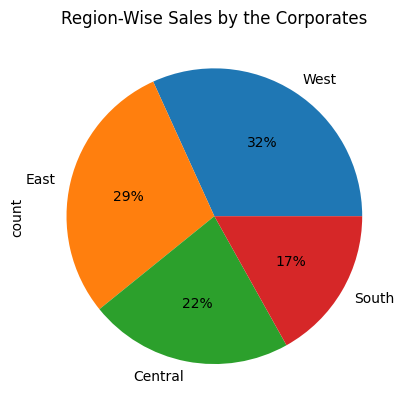

In [72]:
#distirbution of sales pattern about the region by the Corporate category
corporate_data['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

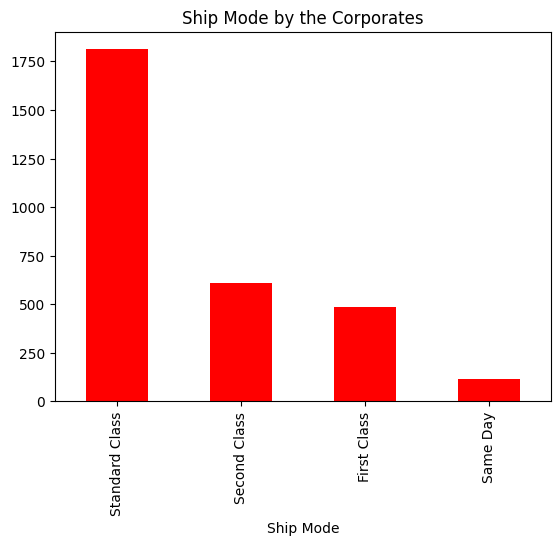

In [73]:
#Shipping mode of items ordered by Corporate segment
corporate_data['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

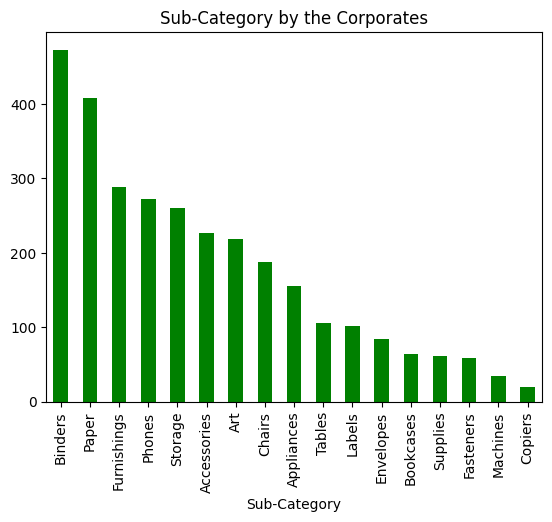

In [74]:
#sub-category items ordered by the Corporate segment
corporate_data['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

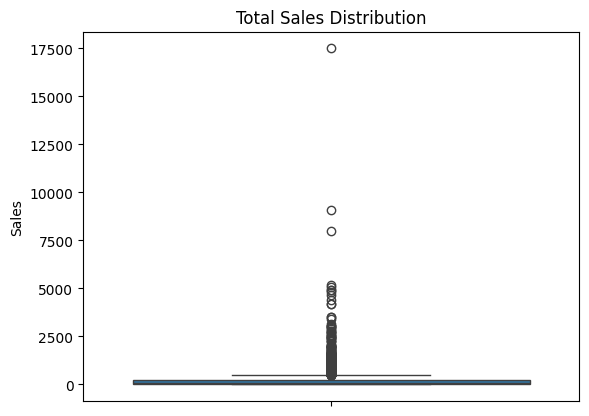

In [75]:
#sales pattern distribution
sns.boxplot(corporate_data['Sales'])
plt.title("Total Sales Distribution")
plt.show()

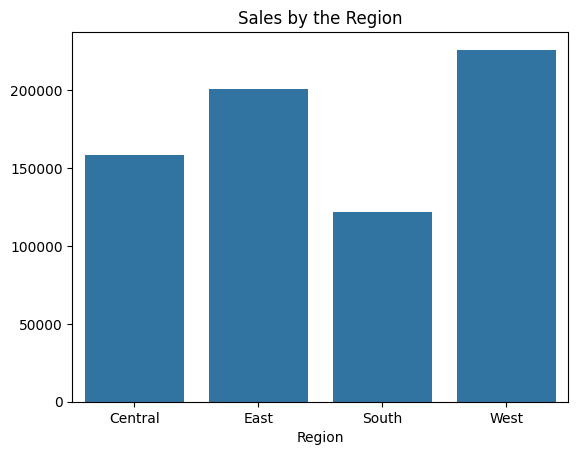

In [76]:
#sales distribution pattern region-wise
sales_region=corporate_data.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

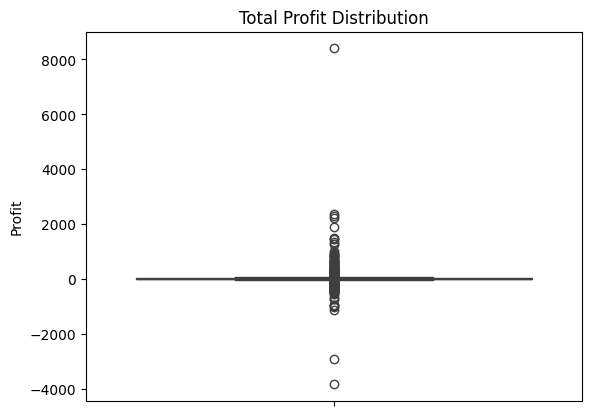

In [77]:
#profit pattern distribution
sns.boxplot(corporate_data['Profit'])
plt.title("Total Profit Distribution")
plt.show()

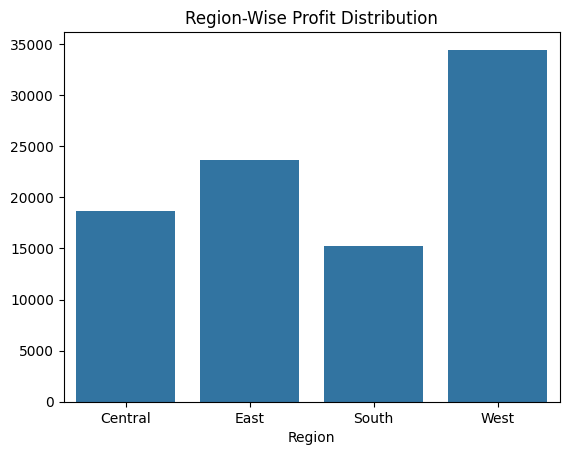

In [78]:
#profit pattern distribution
profit_by_region=corporate_data.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

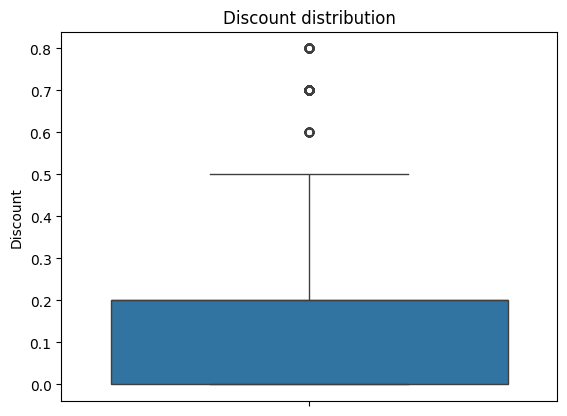

In [79]:
#discount pattern distribution
sns.boxplot(corporate_data['Discount'])
plt.title("Discount distribution")
plt.show()

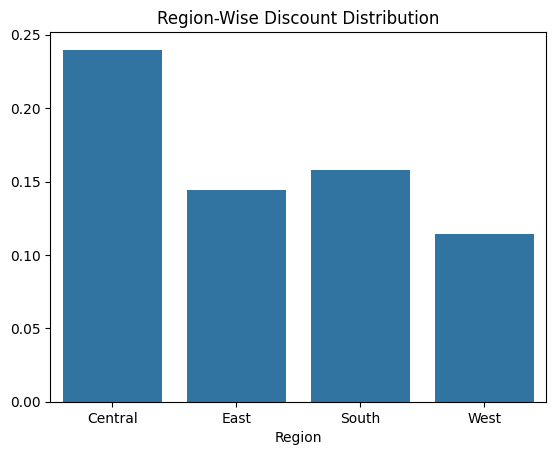

In [80]:
#discount pattern distribution
discount_by_region=corporate_data.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

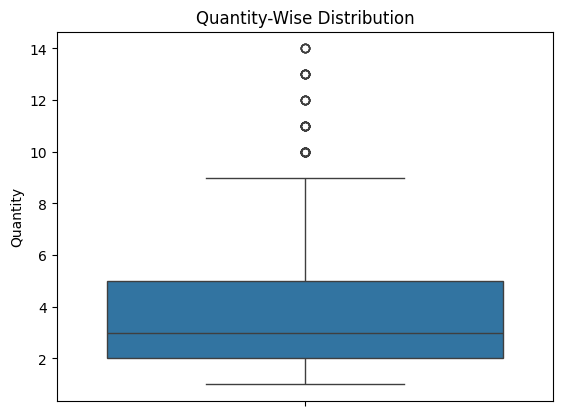

In [81]:
#quantity pattern distribution
sns.boxplot(corporate_data['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

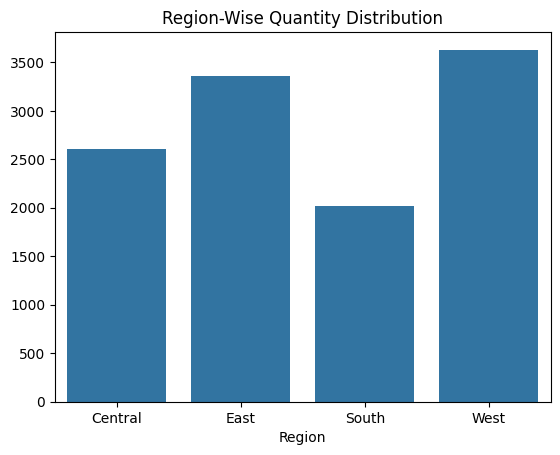

In [82]:
#quantity pattern distribution
quantity_by_region=corporate_data.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [83]:
oe=OrdinalEncoder()
corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
corporate_data['City']=oe.fit_transform(corporate_data[['City']])
corporate_data['State']=oe.fit_transform(corporate_data[['State']])
corporate_data['Region']=oe.fit_transform(corporate_data[['Region']])
corporate_data['Category']=oe.fit_transform(corporate_data[['Category']])
corporate_data['Sub-Category']=oe.fit_transform(corporate_data[['Sub-Category']])
corporate_data['Segment']=oe.fit_transform(corporate_data[['Segment']])
corporate_data['Country']=oe.fit_transform(corporate_data[['Country']])

<ipython-input-83-80ffab47515d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
<ipython-input-83-80ffab47515d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['City']=oe.fit_transform(corporate_data[['City']])
<ipython-input-83-80ffab47515d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [84]:
corporate_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,2.0,DV-13045,Darrin Van Huff,0.0,0.0,168.0,3.0,90036,3.0,OFF-LA-10000240,1.0,10.0,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
21,22,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,24.0,68025,0.0,OFF-AR-10000246,1.0,2.0,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,24.0,68025,0.0,OFF-AP-10001492,1.0,1.0,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884
35,36,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,39.0,75080,0.0,TEC-PH-10004977,2.0,13.0,GE 30524EE4,1097.544,7,0.2,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,39.0,75080,0.0,FUR-FU-10003664,0.0,9.0,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


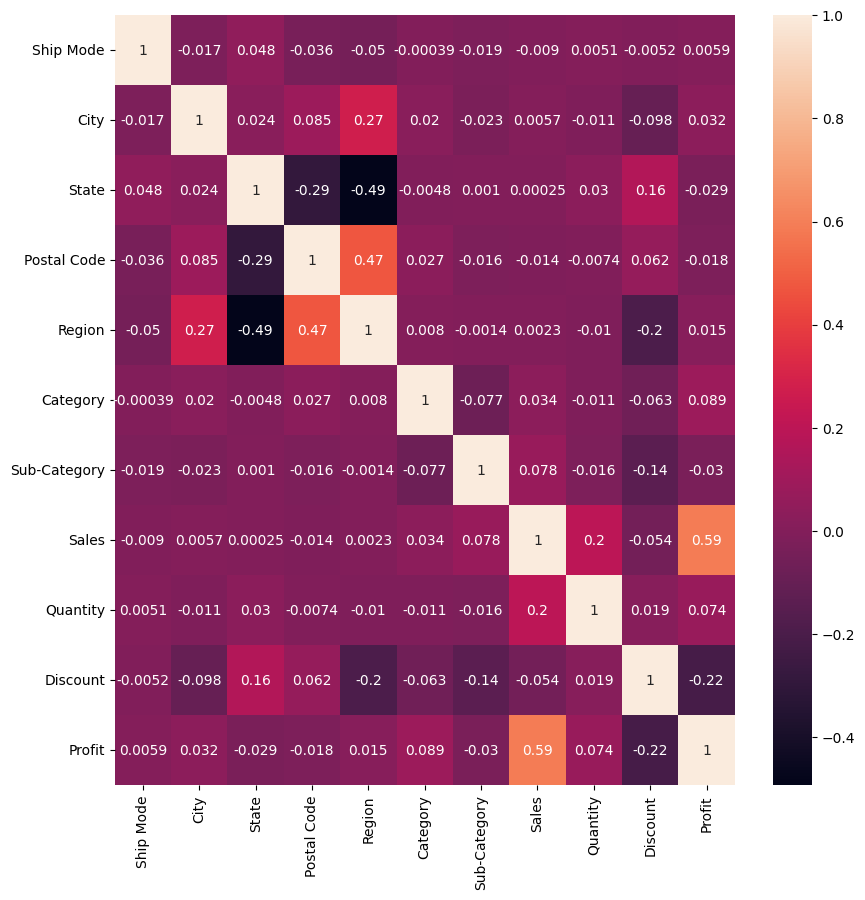

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [86]:
mod_corporate_data=pd.DataFrame(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
mod_corporate_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,2.0,168.0,3.0,90036,3.0,1.0,10.0,14.620,2,0.0,6.8714
21,3.0,106.0,24.0,68025,0.0,1.0,2.0,19.460,7,0.0,5.0596
22,3.0,106.0,24.0,68025,0.0,1.0,1.0,60.340,7,0.0,15.6884
35,0.0,262.0,39.0,75080,0.0,2.0,13.0,1097.544,7,0.2,123.4737
36,0.0,262.0,39.0,75080,0.0,0.0,9.0,190.920,5,0.6,-147.9630


In [87]:
#splitting the dataset
x=mod_corporate_data.drop(columns=['Sales','Profit'],axis='1')
y=mod_corporate_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Predictive Models**

In [88]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()

In [89]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)

SVR()

In [90]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)

**Predictive Model's Performance**

In [91]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8]:
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  j+=1

Performance of Model 1:

Mean Squared Error: 301285.1004702256 

Root Mean Squared Error: 548.8944347233132 

Mean Absolute Error: 249.22709958133777 

Explained Variance Score: 0.04156409591920107 

R2 Score: 0.04150600334223431 



Performance of Model 2:

Mean Squared Error: 277986.6768688551 

Root Mean Squared Error: 527.2444185279301 

Mean Absolute Error: 211.77202021777995 

Explained Variance Score: 0.11564603723885092 

R2 Score: 0.11562649293382032 



Performance of Model 3:

Mean Squared Error: 267514.27401998144 

Root Mean Squared Error: 517.217820671312 

Mean Absolute Error: 198.66834335534386 

Explained Variance Score: 0.14911286692137393 

R2 Score: 0.14894289406205663 



Performance of Model 4:

Mean Squared Error: 235734.89557330246 

Root Mean Squared Error: 485.52538097745463 

Mean Absolute Error: 187.2584418635284 

Explained Variance Score: 0.2500742923643342 

R2 Score: 0.2500442874303863 



Performance of Model 5:

Mean Squared Error: 573114.3362914863 



**Predictive Analysis**

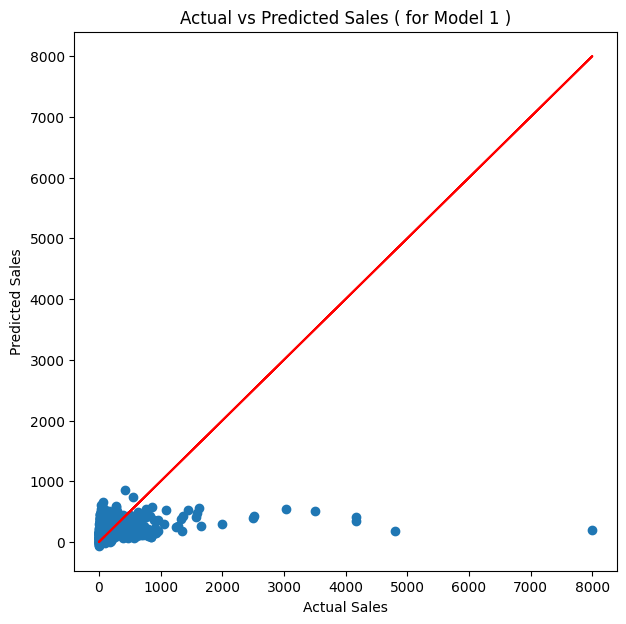

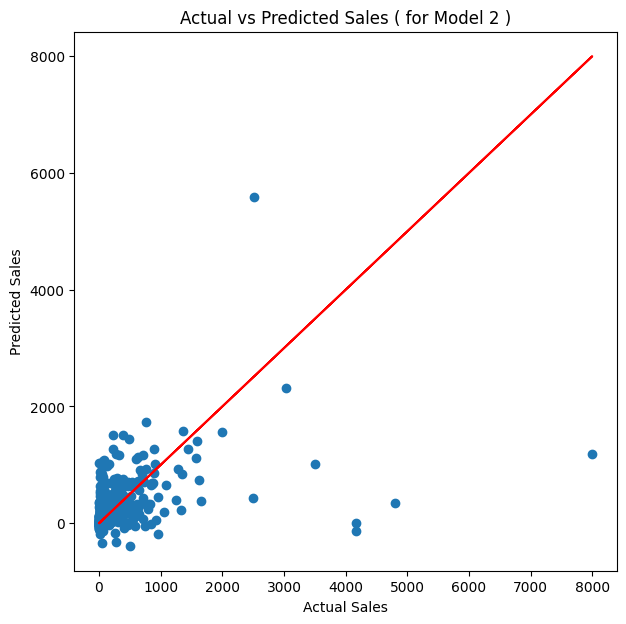

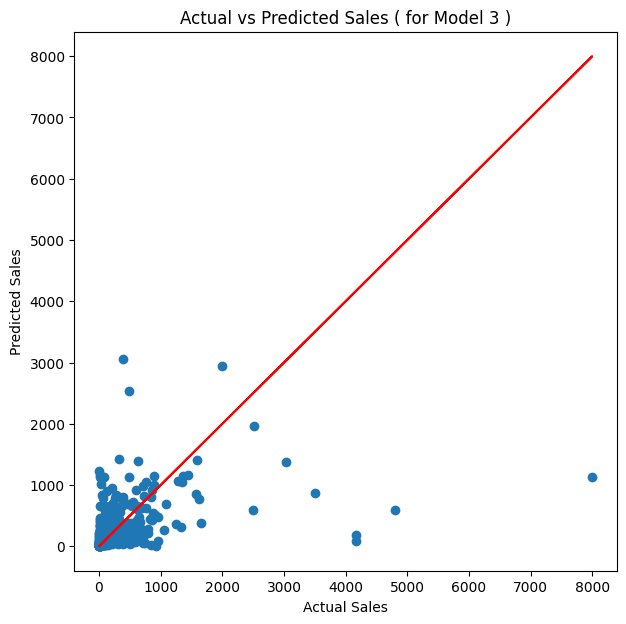

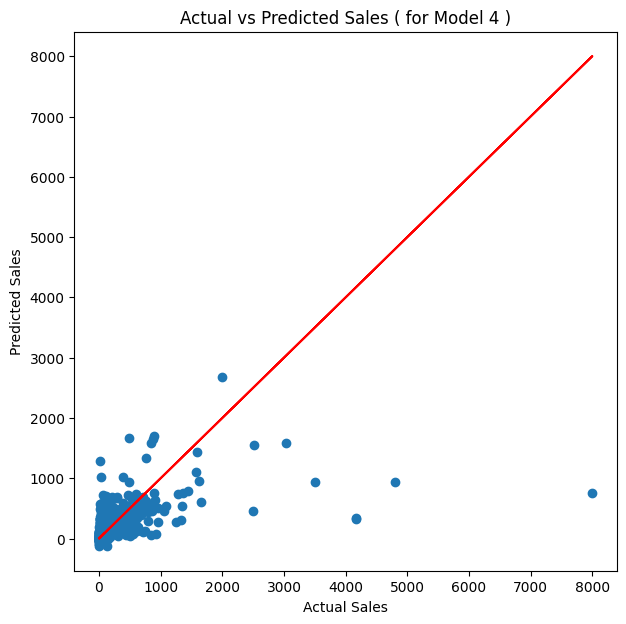

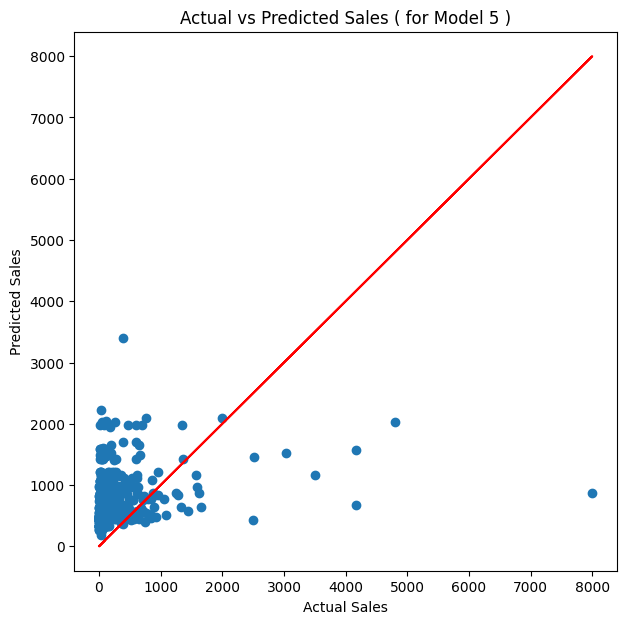

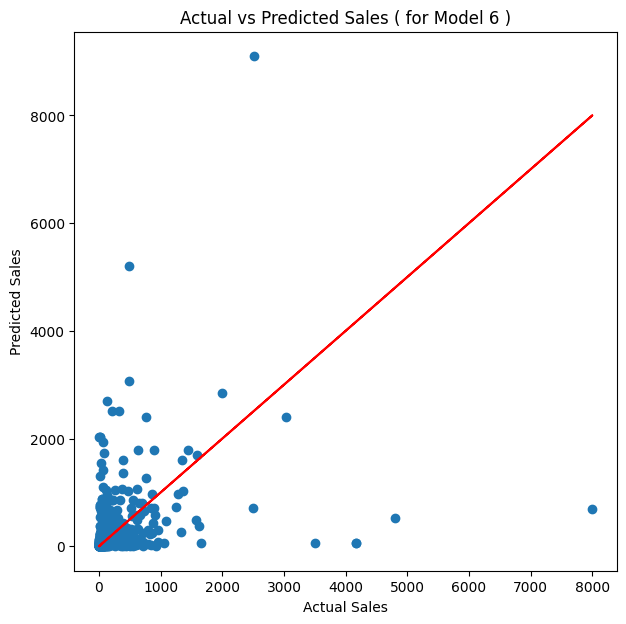

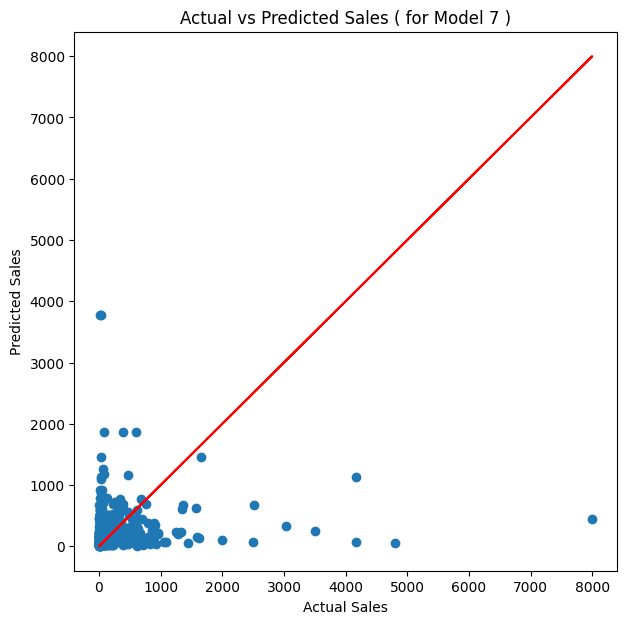

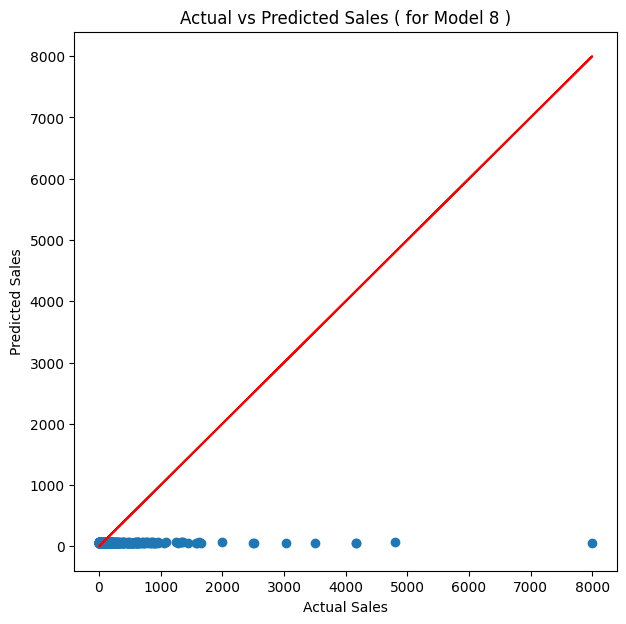

In [92]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8]:
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

In [95]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))

Mean Squared Error: 257066.89334107298
Root Mean Squared Error: 507.0176459858897
Mean Absolute Error: 227.78067558376387
Explained Variance Score: 0.18879822556754022
R2 Score: 0.1821796908565324


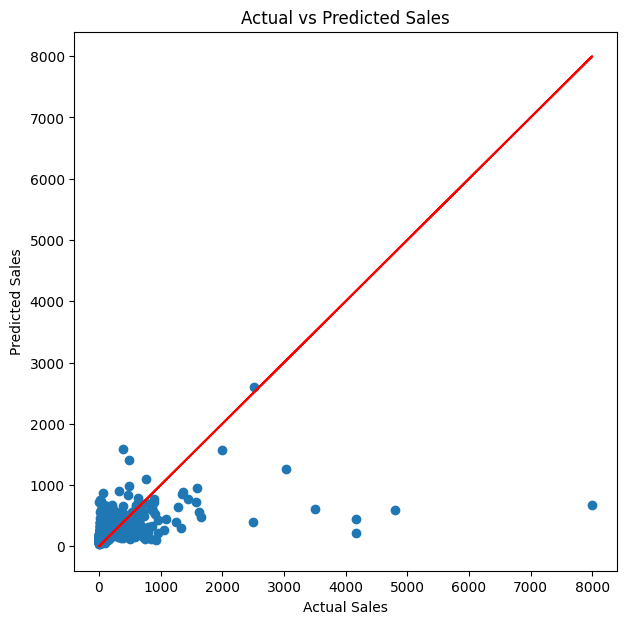

In [94]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()